# Investigation of Frank Anscombes Quartet

### Christian Holm Christensen 

[More on Anscombe's quartet](https://cholmcc.gitlab.io/nbi-python/statistics/#Anscombe)

We import some packages we need (_NumPy_, _SciPy_ statistics, and _Matplotlib_)

In [1]:
import numpy as np 
import scipy.stats
import matplotlib.pyplot as plt

Read in the data.  We skip the first header and ignores lines starting with `D` as comments.  This reads _all_ the data into a single array. 

In [2]:
data = np.genfromtxt('FranksNumbers.txt',skip_header=1,comments='D')

Since all the data sets are in a single array, we read in the file and calculate the index for each data set by looking for lines starting with `Data set`.  The end result is an array of offsets of each data set in the `data` array above. 

In [3]:
ends = []
cnt  = 0
with open('FranksNumbers.txt','r') as file:
    first = True
    for line in file:
        if first:
            first = False
            continue 
        
        line = line.strip()
        if len(line) == 0:
            continue 
            
        if 'Data set' in line:
            ends += [cnt]
        else:
            cnt += 1

We use the offsets found above to define our data sets

In [4]:
ds = [data[s:e] for s, e in zip(ends[:-1],ends[1:])]

To investigate the data sets we make a function that takes a single data set and calculates 

- the variance over the _whole_ data set - that is over _both_ $x$ and $y$. 
- the biased variance over $y$ 

   $$\sigma_y^2 = \frac{1}{N}\sum_{i=1}^{N} (y_i - \bar{y})^2\quad.$$ 
  
- the unbiased variance over $y$ 

   $$\sigma_y^2 = \frac{1}{N-1}\sum_{i=1}^{N} (y_i - \bar{y})^2\quad.$$ 
  
- The linear regression over the data 
- The number of degrees of freedom with respect to a straight line 
- The $\chi^2$ of the data with respect to the straight line, 

  $$\chi^2 = \sum_{i=1}^{N} \frac{\left[y_i - (ax_i+b)\right]^2}{\delta_i^2}\quad,$$ 
  
  calculated in 3 different ways 
  
  - Direct calculation with $\delta^2_i=y_i$ 
  - From _SciPy_  with $\delta^2_i=y_i$
  - Direct with  with $\delta^2_i=1.22$

In [5]:
def comp(ds, slope = 0.48, intercept = 3.02, delta=1.22):
    xyvar     = ds.var()
    yvar_bias = ds[:,1].var()
    yvar_unb  = ds[:,1].var(ddof=1)
    linreg    = scipy.stats.linregress(ds)
    fx        = np.array([slope*x+intercept for x in ds[:,0]])
    nu        = len(ds[:,1])-2
    chi2      = np.sum([(y-f)**2/y for y,f in zip(ds[:,1],fx)])
    chi2d     = np.sum([(y-f)**2/delta**2 for y,f in zip(ds[:,1],fx)])
    chi2sp    = scipy.stats.chisquare(ds[:,1],fx)[0]
    
    print(f' Var[x and y]:            {xyvar:.2f}\n'
          f' Var[y] (biased):         {yvar_bias:.2f}\n'
          f' Var[y] (unbiased):       {yvar_unb:.2f}\n'
          f' Linear reg.:             {linreg.slope:.2f}*x+{linreg.intercept:.2f}\n'
          f' chi^2/nu:                {chi2:.2f}/{nu}={chi2/nu:.1f}\n'
          f' chi^2/nu (delta={delta:4.2})    {chi2d:.2f}/{nu}={chi2d/nu:.1f}\n'
          f' chi^2/nu (SciPy)         {chi2sp:.2f}/{nu}={chi2sp/nu:.1f}')

Another way to investigate the data sets is to plot the data.  The function below plots the data points and calculates some statistics and show that on the plots. 

In [6]:
def plot(ds,ax,slope=0.48,intercept=3.02,delta=1.22):
    xmean     = ds[:,0].mean()
    ymean     = ds[:,1].mean()
    xvar      = ds[:,0].var(ddof=1)
    yvar      = ds[:,1].var(ddof=1)
    linreg    = scipy.stats.linregress(ds)
    fx        = np.array([slope*x+intercept for x in ds[:,0]])
    nu        = len(ds[:,1])-2
    chi2      = np.sum([(y-f)**2/y for y,f in zip(ds[:,1],fx)])
    xs        = np.array([0,20])
    ax.plot(ds[:,0],ds[:,1],'ob',label='Data')
    ax.plot(xs,intercept+slope*xs,'--g',label='Line')
    ax.plot(xs,linreg[1]+linreg[0]*xs,'--r',label='Lin.Reg.')
    ty        = .4
    for v,l in zip([xmean,xvar,ymean,yvar],
                   [r'\bar{x}',r'\sigma_x^2',r'\bar{y}',r'\sigma_y^2']):
        ax.text(.7,ty,'${}={:.2f}$'.format(l,v),transform=ax.transAxes)
        ty -= .08
    ax.text(.4,.05,r'$\chi^2/\nu={:.2f}/{}={:.1f}$'.format(chi2,nu,chi2/nu),
            transform=ax.transAxes)
    ax.legend()

Let us use the functions on our data sets 

Data set 0
 Var[x and y]:            7.44
 Var[y] (biased):         3.75
 Var[y] (unbiased):       4.13
 Linear reg.:             0.50*x+3.00
 chi^2/nu:                1.89/9=0.2
 chi^2/nu (delta= 1.2)    9.47/9=1.1
 chi^2/nu (SciPy)         1.89/9=0.2
Data set 1
 Var[x and y]:            7.44
 Var[y] (biased):         3.75
 Var[y] (unbiased):       4.13
 Linear reg.:             0.50*x+3.00
 chi^2/nu:                2.41/9=0.3
 chi^2/nu (delta= 1.2)    9.48/9=1.1
 chi^2/nu (SciPy)         2.07/9=0.2
Data set 2
 Var[x and y]:            7.44
 Var[y] (biased):         3.75
 Var[y] (unbiased):       4.12
 Linear reg.:             0.50*x+3.00
 chi^2/nu:                1.21/9=0.1
 chi^2/nu (delta= 1.2)    9.46/9=1.1
 chi^2/nu (SciPy)         1.55/9=0.2
Data set 3
 Var[x and y]:            7.44
 Var[y] (biased):         3.75
 Var[y] (unbiased):       4.12
 Linear reg.:             0.50*x+3.00
 chi^2/nu:                2.02/9=0.2
 chi^2/nu (delta= 1.2)    9.45/9=1.1
 chi^2/nu (SciPy)        

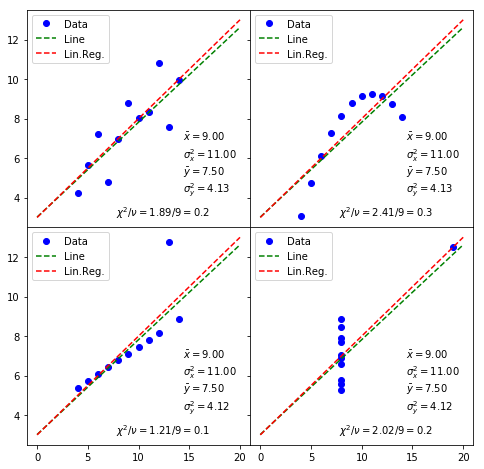

In [7]:
fig, ax = plt.subplots(ncols=2,nrows=2,
                       sharex=True,sharey=True,
                       figsize=(8,8),
                       gridspec_kw=dict(hspace=0,wspace=0))
for i,(d,a) in enumerate(zip(ds,ax.ravel())):
    print(f'Data set {i}')
    comp(d)
    plot(d,a)    